In [1]:
import os
os.environ['PYSR_AUTOLOAD_EXTENSIONS'] = 'no'
from matplotlib import pyplot as plt
from interpret import paretoize, overall_complexity
from utils import load_pickle
%matplotlib inline

In [8]:
# version = 11003
# new one
version = 93102
results_path = f'sr_results/{version}.pkl'
reg = load_pickle(results_path)
# results = reg.equations_[0]
results = reg.equations_

In [9]:
d = {2: {'version': 24880,
         'pysr_version': 93102}}
        #  'complexities': [1, 3, 5, 7, 9, 11, 14, 20, 29, 30]},
    #  3: {'version': 74649,
        #  'pysr_version': 83278},
        #  'complexities': [1, 3, 5, 7, 9, 13, 19, 35, 52, 60]},
    #  4: {'version': 11566,
        #  'pysr_version': 94842},
        #  'complexities': [1, 3, 5, 7, 10, 12, 16, 23, 56, 60]},
    #  5: {'version': 72646,
        #  'pysr_version': 42503}}
        #  'complexities': [1, 3, 5, 7, 11, 19, 27, 40, 59]}}

In [10]:
k_results = {}
for k, v in d.items():
    # load the original PySR table
    pysr_version = v['pysr_version']
    version = v['version']
    pysr_results = load_pickle(f'sr_results/{pysr_version}.pkl').equations_
    all_rmses = load_pickle(f'pickles/pysr_results_all_{version}_{pysr_version}.pkl')['test']

    results = {}
    for comp in all_rmses.keys():
        eq = pysr_results[pysr_results['complexity'] == comp]
        overall_comp = overall_complexity(eq, k)
        results[overall_comp] = all_rmses[comp]

    k_results[k] = results

In [ ]:
f2_linear_models = {
    20: 2702,
    10: 13529,
    5: 7307,
    2: 22160,
}

In [15]:
def nn_test_rmse(version):
    return load_pickle(f'pickles/nn_results_all_{version}.pkl')['test']

In [16]:
# calculate overall complexity
def overall_complexity_f2_linear(k):
    '''
    - k features. each feature is mean/std of a k=2 input feature, which has complexity 3.
    - we do a linear combination of the k features, so that is 3k-1 complexity for that.
    - also there's a bias term, so that adds complexity two (one for the constant, one for the additional plus)
    - total complexity: 2 + (3k-1)*3 = 9k - 3 + 1 = 9k - 1
    '''
    return 9 * k - 1

f2_linear_results = {
    overall_complexity_f2_linear(k): nn_test_rmse(v) for k, v in f2_linear_models.items()
}

In [17]:
f1_id_results = load_pickle('pickles/pysr_results_all_28114_9054.pkl')['test']

In [18]:
pure_sr_results = load_pickle('pickles/pure_sr_results_all_83941.pkl')['test']

In [19]:
def plot_all():
    plt.rcParams["font.family"] = "serif"
    plt.figure(figsize=(8, 5))
    ax = plt.gca()

    # plot k results
    for k in k_results:
        result = k_results[k]
        x, y = zip(*result.items())
        x, y = paretoize(x, y, replace=True)
        ax.plot(x, y, marker='^', label=f'$k = {k}$')

    # add the f2 linear model
    x, y = zip(*f2_linear_results.items())
    x, y = paretoize(x, y, replace=True)
    ax.plot(x, y, marker='o', label='Linear $\psi$')

    # add f1 id results
    x, y = zip(*f1_id_results.items())
    # x, y = paretoize(x, y, replace=True)
    ax.plot(x, y, marker='o', label='f1 identity')

    # add pure SR results
    x, y = zip(*pure_sr_results.items())
    # x, y = paretoize(x, y, replace=True)
    ax.plot(x, y, marker='o', label='Pure SR')

    ax.set_xlabel('Overall complexity', fontsize=14, labelpad=10)
    ax.set_ylabel('RMSE (Resonant)', fontsize=14, labelpad=10)
    ax.legend()
    plt.tight_layout()
    plt.savefig('graphics/top_k_pareto.png', dpi=400, bbox_inches='tight')
    plt.show()

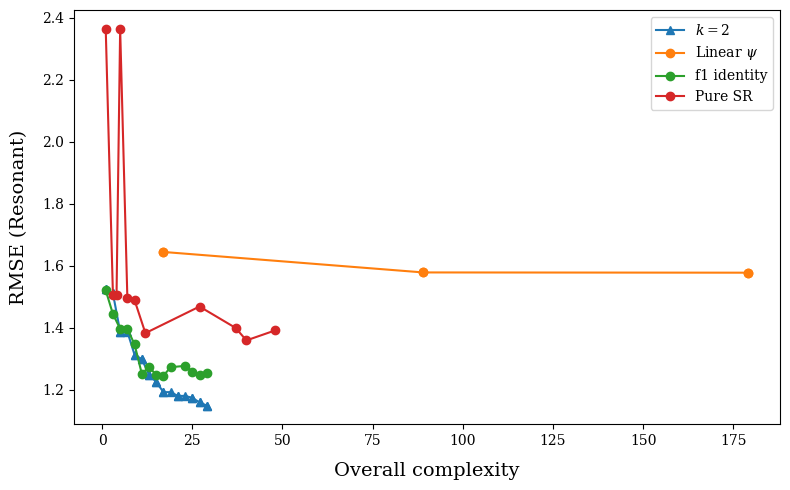

In [20]:
plot_all()